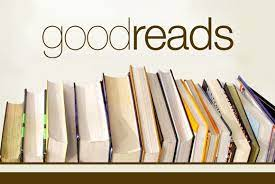

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from jinja2 import escape
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,robust_scale,PolynomialFeatures,OneHotEncoder,LabelBinarizer
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import eli5
from scipy.stats import norm
%matplotlib inline
sns.set(style='white')
sns.set_palette('deep')
import os

In [ ]:
#!pip install jinja2

In [2]:
df = pd.read_csv("../A21_python_labs/data/books.csv",sep=',',error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
df.head(5)

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng          870        2153167               29221   
2           eng          352           6333                 244   
3           eng          435        2339585               36325   
4           eng         2690          41428                 164   

  publication_date        publisher  
0        9/16/2006  Scholastic Inc.  
1         9/1/2004  Scholastic Inc.  
2        11/1/2003       Scholastic  
3         5/1/2004  Scholastic Inc.  
4        9/13/2004       Scholastic

In [4]:
#length of data 
len(df)

11123

In [5]:
#data duplicated or not?
df.duplicated().any()

False

## I- Exploring Data.

In [6]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


<AxesSubplot:>

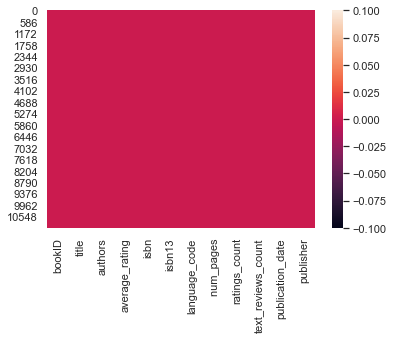

In [7]:
#checking the null value 

#df.isnull().any()
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [8]:
df.describe(include='all')

bookID      title         authors  average_rating        isbn  \
count   11123.000000      11123           11123    11123.000000       11123   
unique           NaN      10348            6639             NaN       11123   
top              NaN  The Iliad  P.G. Wodehouse             NaN  0152052089   
freq             NaN          9              40             NaN           1   
mean    21310.856963        NaN             NaN        3.934075         NaN   
std     13094.727252        NaN             NaN        0.350485         NaN   
min         1.000000        NaN             NaN        0.000000         NaN   
25%     10277.500000        NaN             NaN        3.770000         NaN   
50%     20287.000000        NaN             NaN        3.960000         NaN   
75%     32104.500000        NaN             NaN        4.140000         NaN   
max     45641.000000        NaN             NaN        5.000000         NaN   

              isbn13 language_code     num_pages  ratings_count  \
count   1.112300e+04         11123  11123.000000   1.112300e+04   
unique           NaN            27           NaN            NaN   
top              NaN           eng           NaN            NaN   
freq             NaN          8908           NaN            NaN   
mean    9.759880e+12           NaN    336.405556   1.794285e+04   
std     4.429758e+11           NaN    241.152626   1.124992e+05   
min     8.987060e+09           NaN      0.000000   0.000000e+00   
25%     9.780345e+12           NaN    192.000000   1.040000e+02   
50%     9.780582e+12           NaN    299.000000   7.450000e+02   
75%     9.780872e+12           NaN    416.000000   5.000500e+03   
max     9.790008e+12           NaN   6576.000000   4.597666e+06   

        text_reviews_count publication_date publisher  
count         11123.000000            11123     11123  
unique                 NaN             3679      2290  
top                    NaN        10/1/2005   Vintage  
freq                   NaN               56       318  
mean            542.048099              NaN       NaN  
std            2576.619589              NaN       NaN  
min               0.000000              NaN       NaN  
25%               9.000000              NaN       NaN  
50%              47.000000              NaN       NaN  
75%             238.000000              NaN       NaN  
max           94265.000000              NaN       NaN

In [8]:
profile = ProfileReport(df)
profile

## II- Data Cleaning & Feature Engineering

### a- categorical Data.

In [9]:
categoricaldata=[]

for i in df.columns:
    if df[i].dtypes=="object":
        categoricaldata.append(i)

df[categoricaldata].describe()


title         authors        isbn language_code publication_date  \
count       11123           11123       11123         11123            11123   
unique      10348            6639       11123            27             3679   
top     The Iliad  P.G. Wodehouse  0152052089           eng        10/1/2005   
freq            9              40           1          8908               56   

       publisher  
count      11123  
unique      2290  
top      Vintage  
freq         318

number of distinct publication_date : 3679
publication_date is of type : object 

10/1/2005    56
11/1/2005    53
9/1/2006     51
10/1/2006    48
11/1/2006    40
8/1/2006     39
7/1/2004     39
7/1/2003     37
10/1/2004    37
8/1/2005     37
Name: publication_date, dtype: int64
publication_date is now of type : datetime64[ns] 



Empty DataFrame
Columns: [bookID, title, authors, average_rating, isbn, isbn13, language_code,   num_pages, ratings_count, text_reviews_count, publication_date, publisher]
Index: []

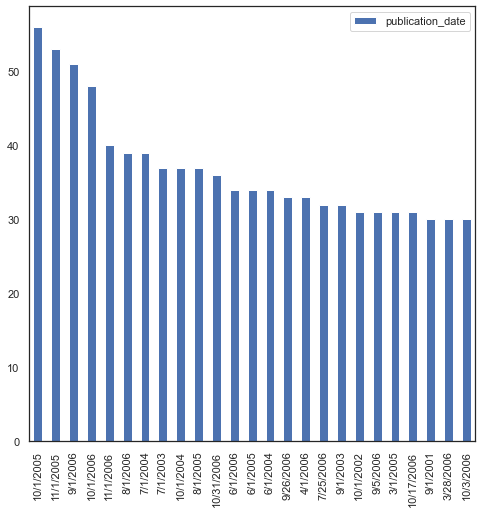

In [10]:
print ("number of distinct publication_date :" ,df["publication_date"].nunique())
print("publication_date is of type :",df.publication_date.dtypes,"\n")
print(df["publication_date"].value_counts().head(10))
df["publication_date"].value_counts().head(25).plot(kind='bar',figsize=(8,8)).legend()
# Convert data type of publication_date from object into date type
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')
print("publication_date is now of type :",df.publication_date.dtypes,"\n")
df[df['publication_date'].isnull()]#checking if all values are well-formed


#Since there are only 2 books with courrpted dates, I googled these 2 books to get the publication dates and put them manually
df.loc[df.bookID == 31373, 'publication_date'] = '1999-10-01'
df.loc[df.bookID == 45531, 'publication_date'] = '1975-10-01'
df[df['publication_date'].isnull()]



number of distinct languages : 27 

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
ale         1
glg         1
tur         1
ara         1
wel         1
srp         1
msa         1
nor         1
nl          1
gla         1
Name: language_code, dtype: int64


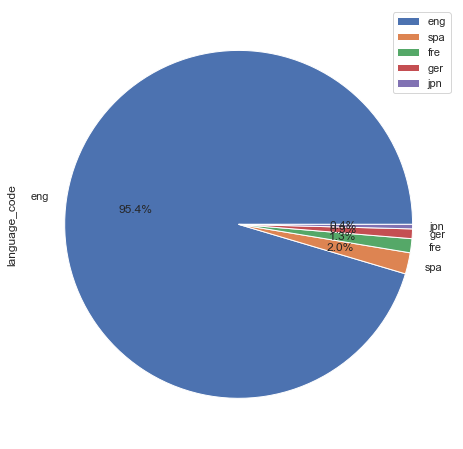

In [11]:
print ("number of distinct languages :" ,df["language_code"].nunique(),"\n")
print(df["language_code"].value_counts())

#since en-US ,en-GB , en are english we can group them into a same language-code
encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} # Unify the langauge codes
df.replace(encoding, inplace=True)

df["language_code"].value_counts().head(5).plot(kind='pie',autopct='%1.1f%%',figsize=(8,8)).legend()

number of distinct title : 10348 

The Iliad                     9
The Brothers Karamazov        9
Anna Karenina                 8
Gulliver's Travels            8
The Odyssey                   8
'Salem's Lot                  8
A Midsummer Night's Dream     7
The Picture of Dorian Gray    7
Treasure Island               6
Collected Stories             6
Name: title, dtype: int64


<AxesSubplot:>

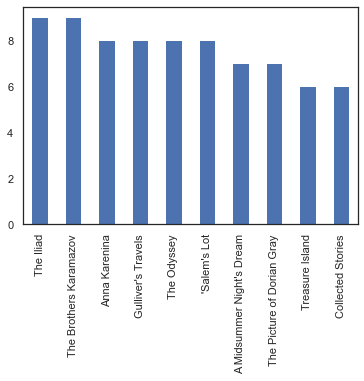

In [12]:
print ("number of distinct title :" ,df["title"].nunique(),"\n")
print(df["title"].value_counts().head(10))
df["title"].value_counts().head(10).plot(kind='bar')

number of distincts authors : 6639 

P.G. Wodehouse      40
Stephen King        40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64


<AxesSubplot:>

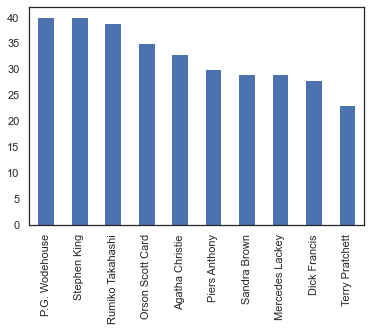

In [13]:
print ("number of distincts authors :" ,df["authors"].nunique(),"\n")
print(df["authors"].value_counts().head(10))
df["authors"].value_counts().head(10).plot(kind='bar')

number of distincts publisher : 2290 

Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64


<AxesSubplot:>

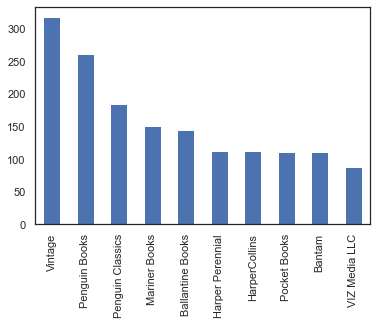

In [14]:
print ("number of distincts publisher :" ,df["publisher"].nunique(),"\n")
print(df["publisher"].value_counts().head(10))
df["publisher"].value_counts().head(10).plot(kind='bar')

In [15]:
print ("number of distinct isbn :" ,df["isbn"].nunique(),"\n")
print(df["isbn"].value_counts().head(10))
print("all isbn number is different from each other")

number of distinct isbn : 11123 

0152052089    1
0060882611    1
0674990471    1
1569719608    1
0192836366    1
0312861877    1
0061030651    1
1416546022    1
0380815591    1
0765343266    1
Name: isbn, dtype: int64
all isbn number is different from each other


In [ ]:
#sns.boxplot(data=(df[numericaldata]), orient="v", palette="Set2")
#plt.show()
#sns.swarmplot(df[categoricaldata].any(), y=df.average_rating, color=".25")


#ax = sns.boxplot(data=iris_long, x="value", y="variable", orient="h", palette="Set2", hue="species")
#plt.tight_layout()
#plt.show()


### b-  Numerical Data.

In [16]:
# Extract year of publication in a separate column
df['year'] = pd.DatetimeIndex(df['publication_date']).year 

# Rename the column to remove leading whitespaces
df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)



In [57]:
# Add a new feature which has the number of occurences of each book
df['num_occ'] = df.groupby('title')['title'].transform('count') 


df['rate_occ'] = df['average_rating'] * df['num_occ'] #rating by occurence
df['rate_weight'] = df['average_rating'] * df['text_reviews_count']# rate weighted by review
df['rate_weight_2'] = df['average_rating'] * df['ratings_count']# rate weigth
df['rate_per_pages'] = df['average_rating'] * df['num_pages']#rate per page

bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1                             J.K. Rowling/Mary GrandPré            4.49   
2                                           J.K. Rowling            4.42   
3                             J.K. Rowling/Mary GrandPré            4.56   
4                             J.K. Rowling/Mary GrandPré            4.78   
...                                                  ...             ...   
11118  William T. Vollmann/Larry McCaffery/Michael He...            4.06   
11119                                William T. Vollmann            4.08   
11120                                William T. Vollmann            3.96   
11121                                William T. Vollmann            3.72   
11122                                         Mark Twain            3.91   

             isbn         isbn13 language_code  num_pages  ratings_count  \
0      0439785960  9780439785969           eng        652        2095690   
1      0439358078  9780439358071           eng        870        2153167   
2      0439554896  9780439554893           eng        352           6333   
3      043965548X  9780439655484           eng        435        2339585   
4      0439682584  9780439682589           eng       2690          41428   
...           ...            ...           ...        ...            ...   
11118  1560254416  9781560254416           eng        512            156   
11119  0140110879  9780140110876           eng        635            783   
11120  0140131965  9780140131963           eng        415            820   
11121  0060878827  9780060878825           eng        434            769   
11122  8497646983  9788497646987           spa        272            113   

       text_reviews_count     publication_date        publisher  year  \
0                   27591  2006-09-16 00:00:00  Scholastic Inc.  2006   
1                   29221  2004-09-01 00:00:00  Scholastic Inc.  2004   
2                     244  2003-11-01 00:00:00       Scholastic  2003   
3                   36325  2004-05-01 00:00:00  Scholastic Inc.  2004   
4                     164  2004-09-13 00:00:00       Scholastic  2004   
...                   ...                  ...              ...   ...   
11118                  20  2004-12-21 00:00:00    Da Capo Press  2004   
11119                  56  1988-12-01 00:00:00    Penguin Books  1988   
11120                  95  1993-08-01 00:00:00    Penguin Books  1993   
11121                 139  2007-02-27 00:00:00             Ecco  2007   
11122                  12  2006-05-28 00:00:00    Edimat Libros  2006   

       num_occ  rate_occ  rate_weight  rate_weight_2  rate_per_pages  
0            2      9.14    126090.87     9577303.30         2979.64  
1            1      4.49    131202.29     9667719.83         3906.30  
2            2      8.84      1078.48       27991.86         1555.84  
3            2      9.12    165642.00    10668507.60         1983.60  
4            1      4.78       783.92      198025.84        12858.20  
...        ...       ...          ...            ...         

In [19]:
numericaldata=[]

for i in df.columns:
    if df[i].dtypes=="int64" or df[i].dtypes=="float64":
        numericaldata.append(i)

df[numericaldata].describe()

bookID  average_rating        isbn13     num_pages  \
count  11123.000000    11123.000000  1.112300e+04  11123.000000   
mean   21310.856963        3.934075  9.759880e+12    336.405556   
std    13094.727252        0.350485  4.429758e+11    241.152626   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10277.500000        3.770000  9.780345e+12    192.000000   
50%    20287.000000        3.960000  9.780582e+12    299.000000   
75%    32104.500000        4.140000  9.780872e+12    416.000000   
max    45641.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count          year       num_occ  \
count   1.112300e+04        11123.000000  11123.000000  11123.000000   
mean    1.794285e+04          542.048099   2000.168300      1.241302   
std     1.124992e+05         2576.619589      8.248887      0.875055   
min     0.000000e+00            0.000000   1900.000000      1.000000   
25%     1.040000e+02            9.000000   1998.000000      1.000000   
50%     7.450000e+02           47.000000   2003.000000      1.000000   
75%     5.000500e+03          238.000000   2005.000000      1.000000   
max     4.597666e+06        94265.000000   2020.000000      9.000000   

           rate_occ    rate_weight  rate_weight_2  rate_per_pages  
count  11123.000000   11123.000000   1.112300e+04    11123.000000  
mean       4.888351    2162.855219   7.209551e+04     1336.162010  
std        3.500185   10389.499981   4.532613e+05     1027.032037  
min        0.000000       0.000000   0.000000e+00        0.000000  
25%        3.800000      35.100000   4.063300e+02      768.000000  
50%        4.000000     183.150000   2.936670e+03     1154.420000  
75%        4.230000     928.105000   1.971079e+04     1648.480000  
max       38.880000  379669.970000   1.650562e+07    30907.200000

## III- Data Analysis

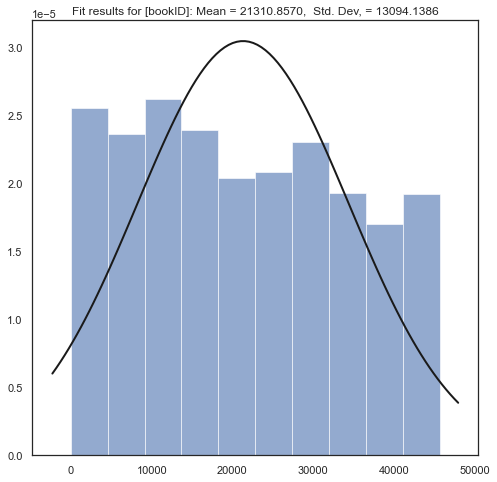

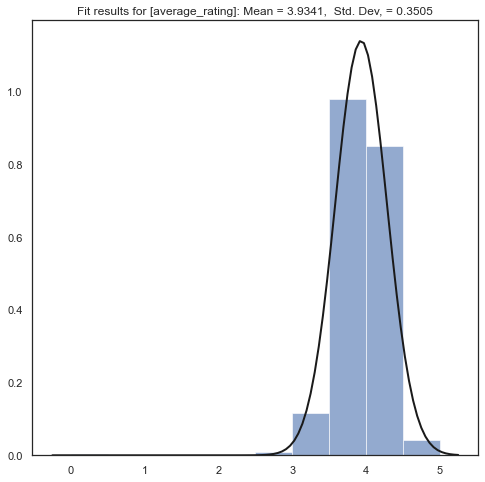

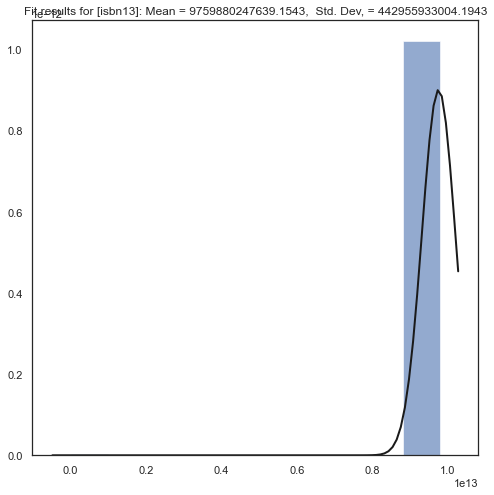

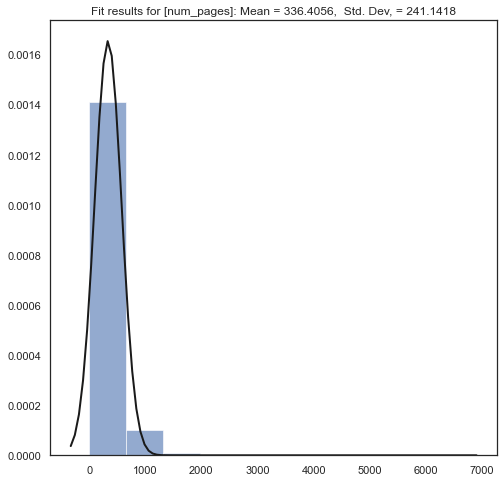

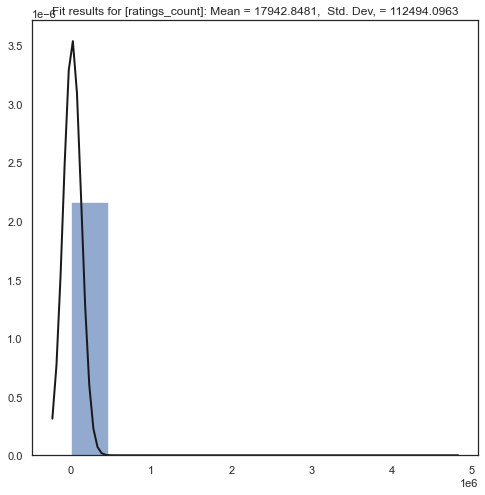

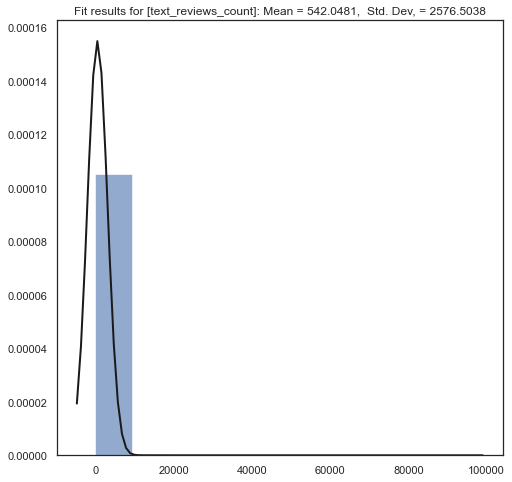

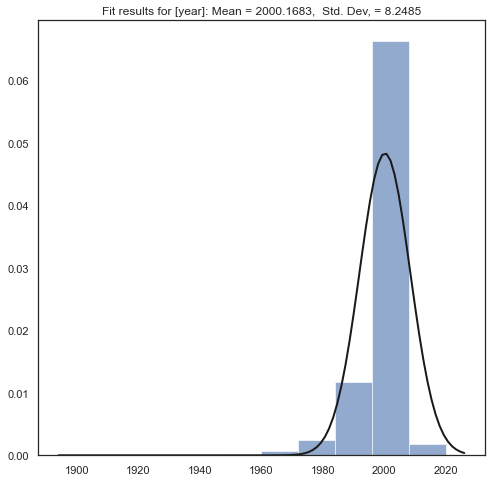

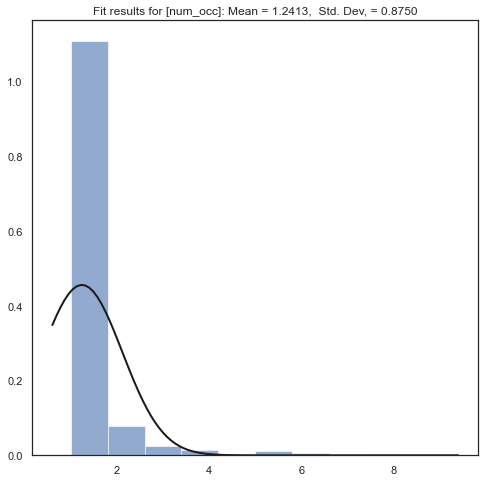

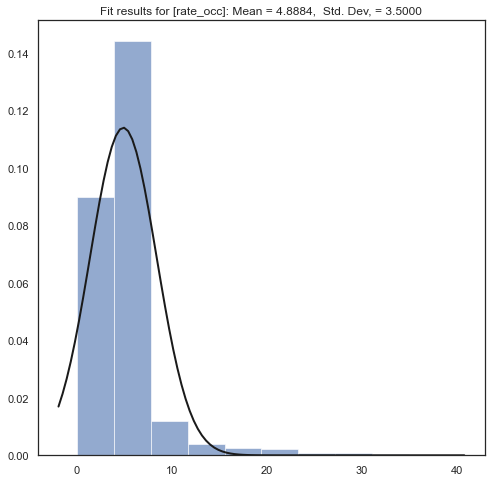

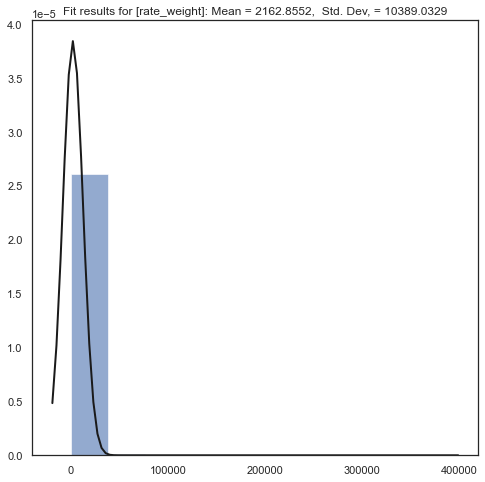

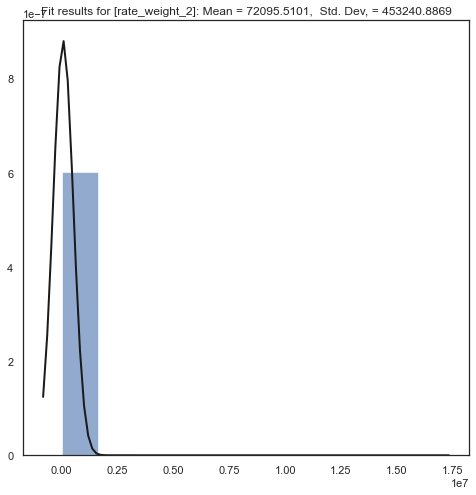

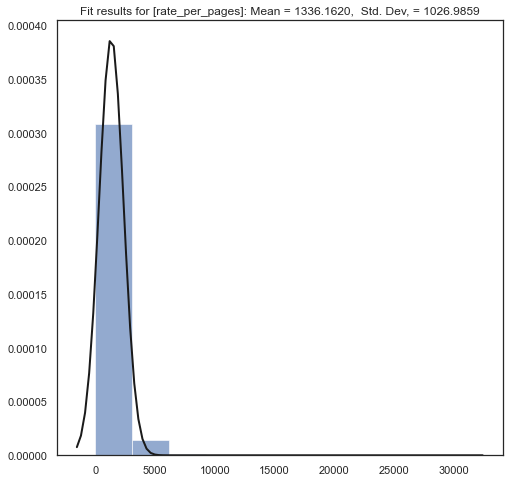

In [19]:
#ploting numerical data and 
for i in df[numericaldata]:
    dMean, dStd = norm.fit(df[i])
    plt.figure(figsize = (8, 8))
    # Plot hist
    plt.hist(df[i], density=True, alpha=0.6)
        
        
    # Plot PDF.
    xmin, xmax = plt.xlim()
    xlin = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(xlin, dMean, dStd)
    plt.plot(xlin, pdf, 'k', linewidth=2)
    title = "Fit results for [" + i + "]: Mean = %.4f,  Std. Dev, = %.4f" % (dMean, dStd)
    plt.title(title)
        
        

In [56]:
#the density of average_rating has the normal distribution based on the bell curve

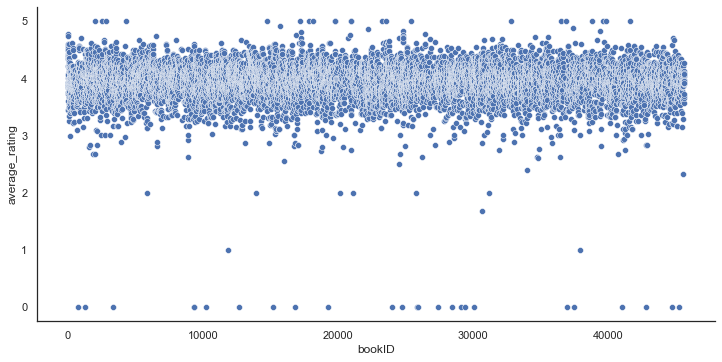

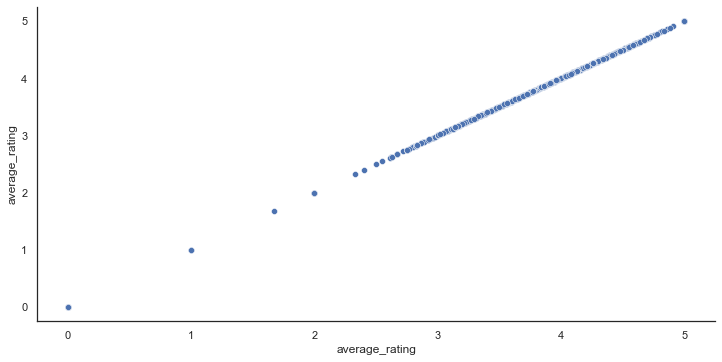

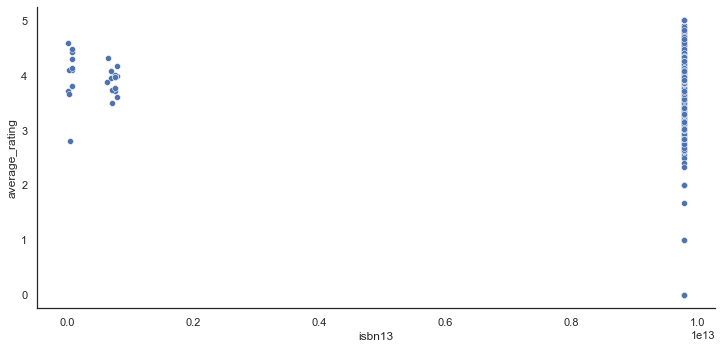

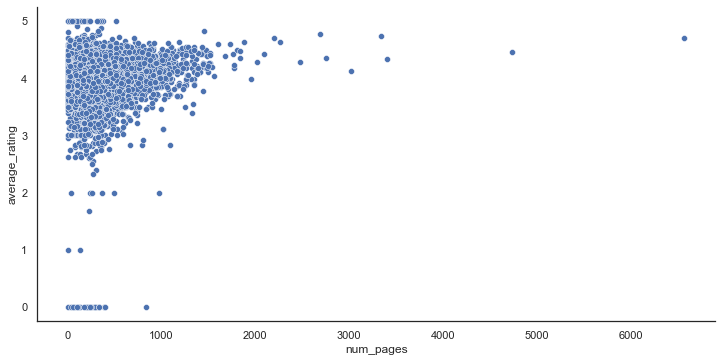

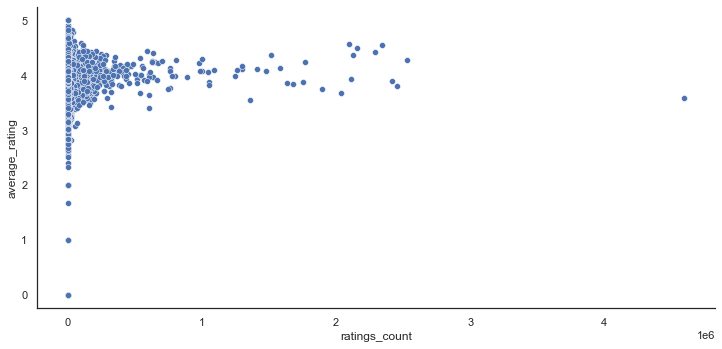

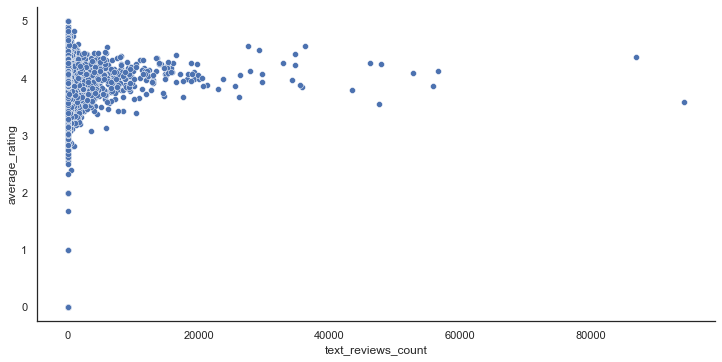

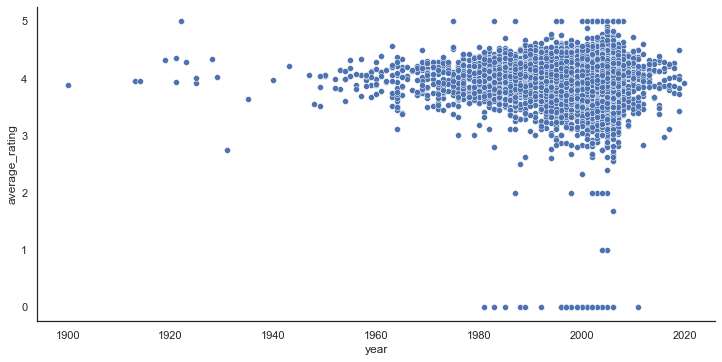

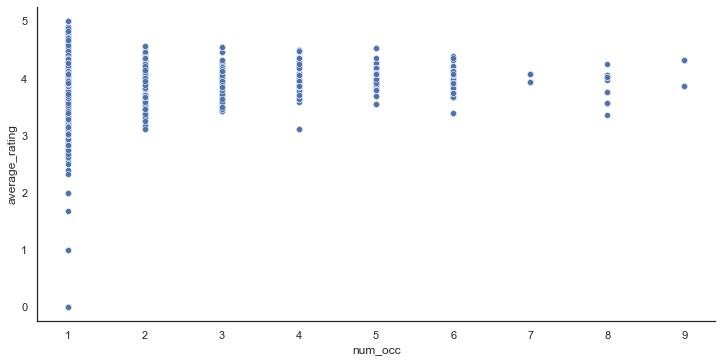

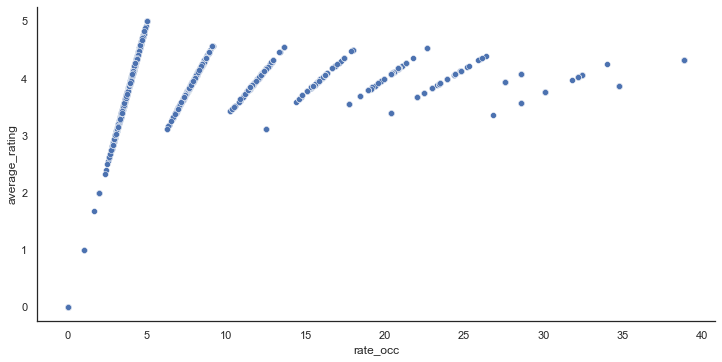

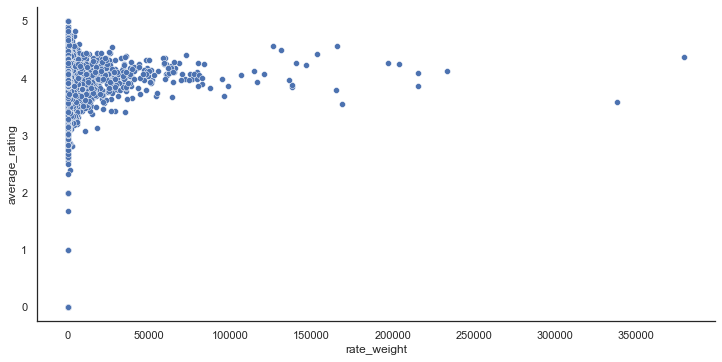

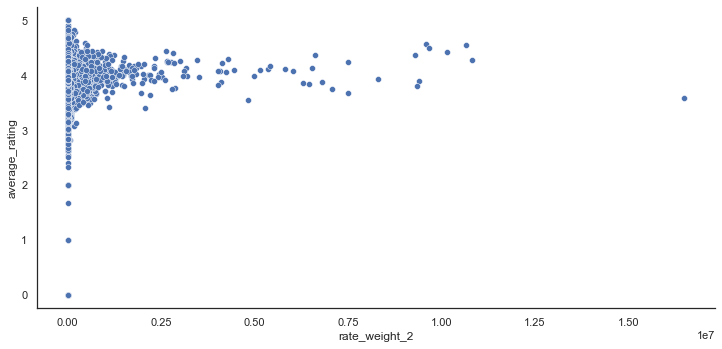

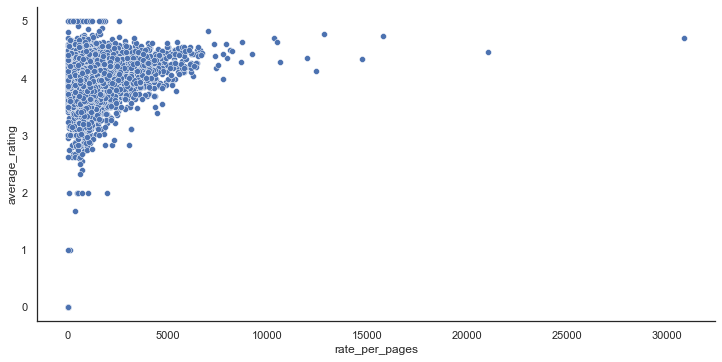

In [20]:
for i in df[numericaldata]:
    sns.relplot(x="{0}".format(i), y="average_rating", data=df, height=5, aspect = 2)

bookID  average_rating    isbn13  num_pages  \
bookID              1.000000       -0.036207 -0.002185  -0.026134   
average_rating     -0.036207        1.000000 -0.001965   0.150477   
isbn13             -0.002185       -0.001965  1.000000  -0.009818   
num_pages          -0.026134        0.150477 -0.009818   1.000000   
ratings_count      -0.076820        0.038224  0.005494   0.034337   
text_reviews_count -0.081289        0.033663  0.008152   0.036977   
year                0.027327       -0.031742 -0.000349  -0.019613   
num_occ            -0.112645        0.016227  0.013033   0.063057   
rate_occ           -0.115602        0.127515  0.012688   0.081209   
rate_weight        -0.081075        0.042373  0.007919   0.038998   
rate_weight_2      -0.077622        0.044985  0.005294   0.036182   
rate_per_pages     -0.029263        0.243642 -0.011621   0.991624   

                    ratings_count  text_reviews_count      year   num_occ  \
bookID                  -0.076820           -0.081289  0.027327 -0.112645   
average_rating           0.038224            0.033663 -0.031742  0.016227   
isbn13                   0.005494            0.008152 -0.000349  0.013033   
num_pages                0.034337            0.036977 -0.019613  0.063057   
ratings_count            1.000000            0.865977  0.044568  0.092366   
text_reviews_count       0.865977            1.000000  0.066914  0.070006   
year                     0.044568            0.066914  1.000000 -0.001678   
num_occ                  0.092366            0.070006 -0.001678  1.000000   
rate_occ                 0.096611            0.074066 -0.005138  0.991943   
rate_weight              0.860792            0.997503  0.065819  0.069620   
rate_weight_2            0.997043            0.861244  0.044116  0.091423   
rate_per_pages           0.036643            0.038182 -0.026348  0.060569   

                    rate_occ  rate_weight  rate_weight_2  rate_per_pages  
bookID             -0.115602    -0.081075      -0.077622       -0.029263  
average_rating      0.127515     0.042373       0.044985        0.243642  
isbn13              0.012688     0.007919       0.005294       -0.011621  
num_pages           0.081209     0.038998       0.036182        0.991624  
ratings_count       0.096611     0.860792       0.997043        0.036643  
text_reviews_count  0.074066     0.997503       0.861244        0.038182  
year               -0.005138     0.065819       0.044116       -0.026348  
num_occ             0.991943     0.069620       0.091423        0.060569  
rate_occ            1.000000     0.074954       0.096809        0.089326  
rate_weight         0.074954     1.000000       0.860903        0.041317  
rate_weight_2       0.096809     0.860903       1.000000        0.039397  
rate_per_pages      0.089326     0.041317       0.039397        1.000000

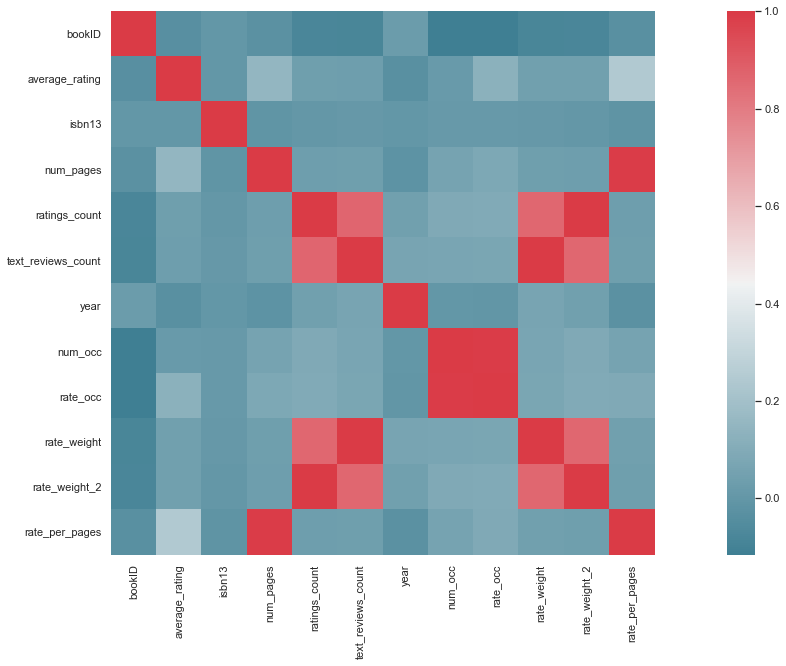

In [21]:
#correlation between numerical variables 

fig = plt.gcf()
fig.set_size_inches(26, 10)
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

df[numericaldata].corr()

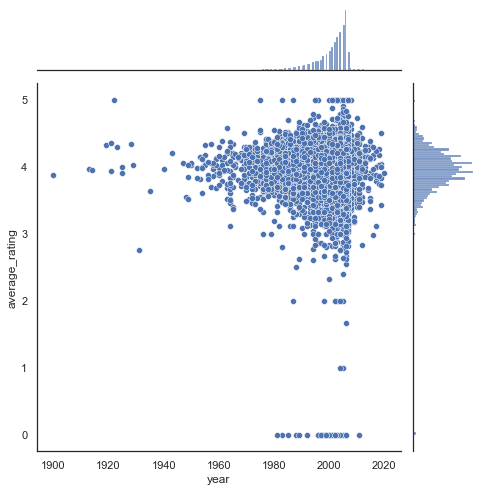

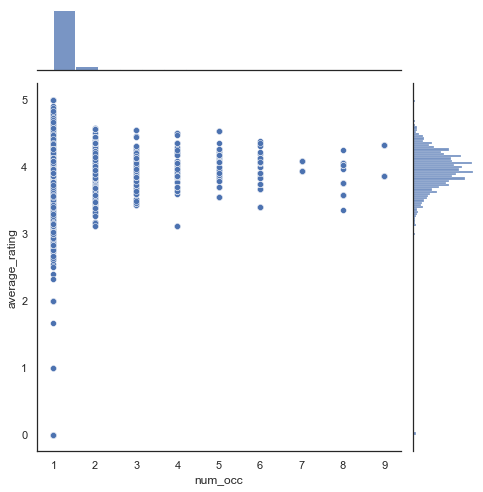

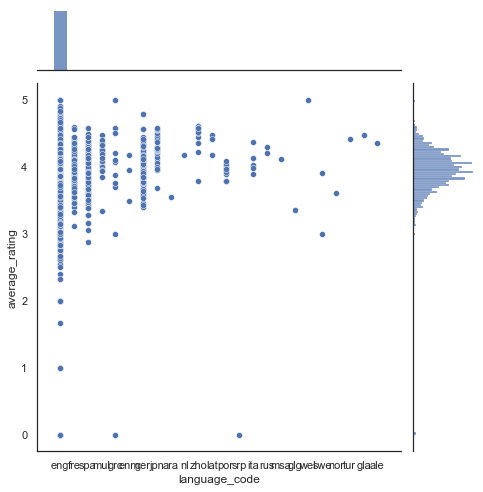

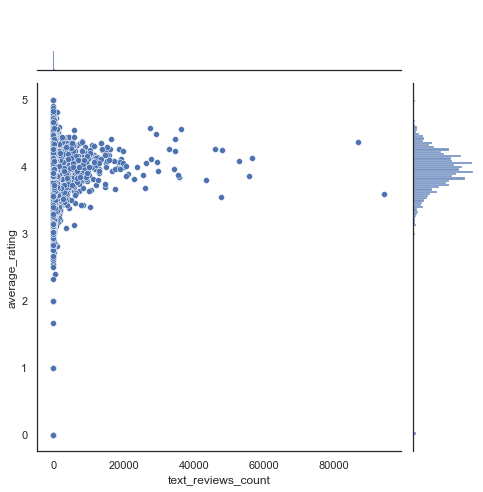

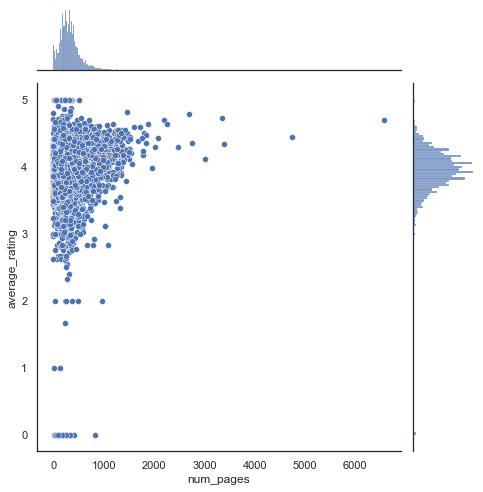

In [22]:
for i in ["year","num_occ","language_code","text_reviews_count","num_pages"]:
    sns.jointplot(x="{}".format(i), y="average_rating", data=df, height=7)#, aspect = 2)
    

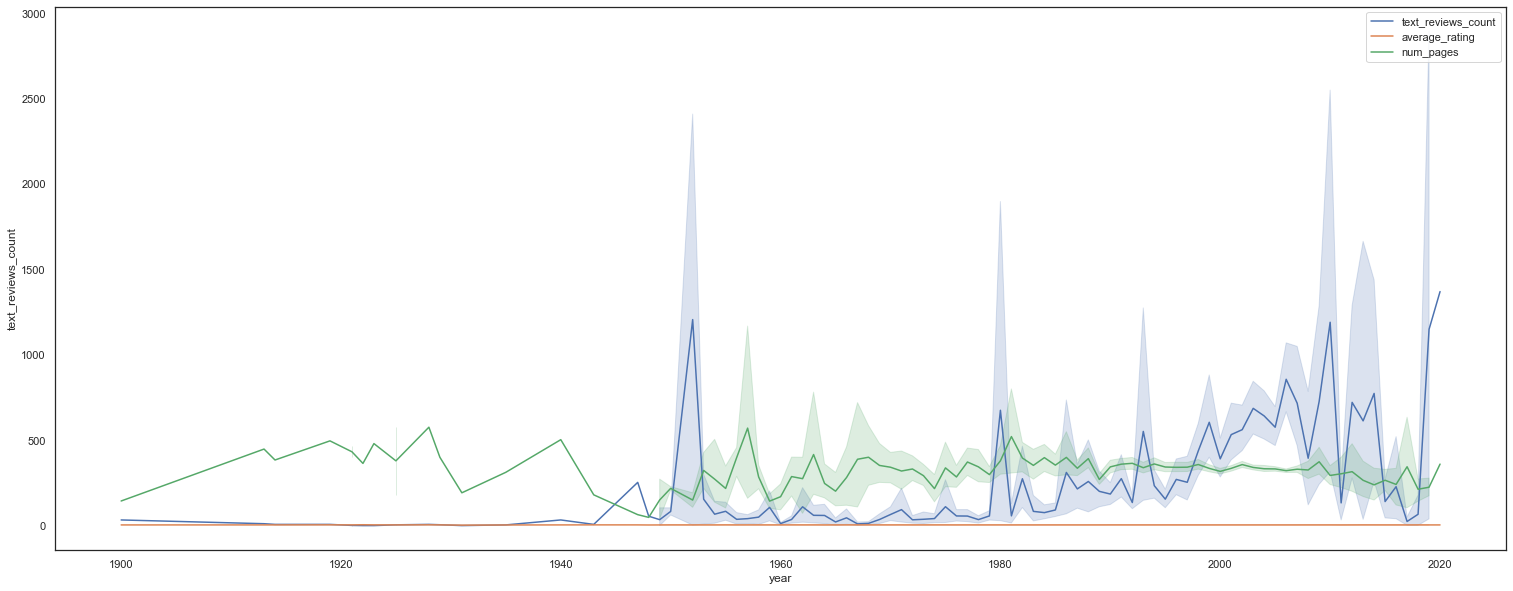

In [23]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="year", y="text_reviews_count", data=df)
sns.lineplot(x="year", y="average_rating", data=df)
sns.lineplot(x="year", y="num_pages", data=df)
plt.legend(labels=["text_reviews_count","average_rating","num_pages"])


In [24]:
#Number of authors
allAuthors = df.authors.unique()
y_pos = np.arange(len(allAuthors))

print(len(allAuthors))

top10Authors = df[['authors', 'title']].groupby(['authors']).count()
top10Authors = top10Authors.sort_values(by=['title'], ascending=False)
top10Authors = top10Authors.head(10)
top10Authors

6639


title
authors                   
Stephen King            40
P.G. Wodehouse          40
Rumiko Takahashi        39
Orson Scott Card        35
Agatha Christie         33
Piers Anthony           30
Mercedes Lackey         29
Sandra Brown            29
Dick Francis            28
Laurell K. Hamilton     23

In [ ]:
Stephen King ,P.G. Wodehouse and Rumiko Takahashi are Authors who wrote the most books!

In [25]:
#supposing that 4/5 is upper than Average and Median , we can consider it at a upper ratting
GoodRatedAuthors2 = df[df['average_rating']>=4]
GoodRatedAuthors2=GoodRatedAuthors2[['authors', 'title','average_rating']]\
                    .groupby(['authors'])\
                    .agg({'title':['count'],'average_rating': ['mean', 'min', 'max']})\
                    .sort_values(('title','count'), ascending = False)
GoodRatedAuthors2.head(10)

title average_rating            
                    count           mean   min   max
authors                                             
Rumiko Takahashi       36       4.207222  4.04  4.36
P.G. Wodehouse         34       4.194118  4.01  4.48
Mercedes Lackey        19       4.117368  4.01  4.27
Stephen King           18       4.191111  4.00  4.54
Terry Pratchett        18       4.197778  4.00  4.38
J.R.R. Tolkien         17       4.395882  4.05  4.59
Dr. Seuss              15       4.134667  4.00  4.35
Laurell K. Hamilton    15       4.109333  4.01  4.54
Agatha Christie        14       4.169286  4.01  4.39
Tite Kubo              14       4.326429  4.22  4.42

In [ ]:
-Who are the top 10 highly rated books

In [26]:
GoodRatedTitle=df[[ 'title','average_rating']].groupby(['title'])\
                            .agg({'title':['count'],'average_rating': ['mean']})\
                            .sort_values(('title','count'), ascending = False)
GoodRatedTitle.columns=['count','mean_rating']
GoodRatedTitle.head(10)

count  mean_rating
title                                         
The Iliad                       9      3.86000
The Brothers Karamazov          9      4.32000
Anna Karenina                   8      4.05000
'Salem's Lot                    8      4.04875
Gulliver's Travels              8      3.59250
The Odyssey                     8      3.76000
The Picture of Dorian Gray      7      4.08000
A Midsummer Night's Dream       7      3.94000
The Great Gatsby                6      3.90500
Sense and Sensibility           6      4.07000

In [ ]:
sns.pairplot(df[numericaldata])
plt.show()

## VI- Processing

In [ ]:
#copy dataframe
df1=df.copy()

In [ ]:
#from sklearn.feature_selection import

- encoding categorical variables 
we chose to one-hot encoding because the ordinal does not fit with our categorical variable : \
there is no order between two title fror instance 

In [ ]:


#plt.figure(figsize = (10, 10))
#df.boxplot(column= ['title', 'authors', 'isbn', 'language_code', 'publication_date','publisher'])
#plt.show()



In [ ]:
df2=df[categoricaldata].copy()
df3=df[numericaldata].copy()

In [20]:
categoricaldata=[]

for i in df.columns:
    if df[i].dtypes=="object":
        categoricaldata.append(i)
categoricaldata

['title', 'authors', 'isbn', 'language_code', 'publication_date', 'publisher']

In [21]:
#


Encod=LabelEncoder()
#encoding title column
df['title'] = Encod.fit_transform(df['title'])

#encoding authors column
df['authors'] = Encod.fit_transform(df['authors'])

#encoding isbn column
df['isbn'] = Encod.fit_transform(df['isbn'])

#encoding language_code column
languages = pd.get_dummies(df['language_code'])
df=pd.concat([df,languages],axis=1)

#encoding publisher column
df['publisher'] = Encod.fit_transform(df['publisher'])

In [ ]:
df

In [22]:
numericaldata=[]

for i in df.columns:
    if df[i].dtypes=="int64" or df[i].dtypes=="float64":
        numericaldata.append(i)
numericaldata

['bookID',
 'average_rating',
 'isbn13',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'year',
 'num_occ',
 'rate_occ',
 'rate_weight',
 'rate_weight_2',
 'rate_per_pages']

In [23]:

y = df['average_rating'].values
X = df.drop(['bookID','isbn', 'isbn13', 'publication_date','language_code', 'publisher', 'average_rating'], axis=1)


In [24]:
X

title  authors  num_pages  ratings_count  text_reviews_count  year  \
0       3070     2626        652        2095690               27591  2006   
1       3071     2626        870        2153167               29221  2004   
2       3068     2622        352           6333                 244  2003   
3       3073     2626        435        2339585               36325  2004   
4       3063     2626       2690          41428                 164  2004   
...      ...      ...        ...            ...                 ...   ...   
11118   2429     6556        512            156                  20  2004   
11119  10216     6555        635            783                  56  1988   
11120   7841     6555        415            820                  95  1993   
11121   5420     6555        434            769                 139  2007   
11122   3949     4116        272            113                  12  2006   

       num_occ  rate_occ  rate_weight  rate_weight_2  ...  nl  nor  por  rus  \
0            2      9.14    126090.87     9577303.30  ...   0    0    0    0   
1            1      4.49    131202.29     9667719.83  ...   0    0    0    0   
2            2      8.84      1078.48       27991.86  ...   0    0    0    0   
3            2      9.12    165642.00    10668507.60  ...   0    0    0    0   
4            1      4.78       783.92      198025.84  ...   0    0    0    0   
...        ...       ...          ...            ...  ...  ..  ...  ...  ...   
11118        1      4.06        81.20         633.36  ...   0    0    0    0   
11119        1      4.08       228.48        3194.64  ...   0    0    0    0   
11120        1      3.96       376.20        3247.20  ...   0    0    0    0   
11121        1      3.72       517.08        2860.68  ...   0    0    0    0   
11122        1      3.91        46.92         441.83  ...   0    0    0    0   

       spa  srp  swe  tur  wel  zho  
0        0    0    0    0    0    0  
1        0    0    0    0    0    0  
2        0    0    0    0    0    0  
3        0    0    0    0    0    0  
4        0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  
11118    0    0    0    0    0    0  
11119    0    0    0    0    0    0  
11120    0    0    0    0    0    0  
11121    0    0    0    0    0    0  
11122    1    0    0    0    0    0  

[11123 rows x 35 columns]

In [ ]:
y

In [25]:
# Split the Data into 70% - 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### - Modelisation

- Multiple Linear regression

In [26]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model1  = LinearRegression()

parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]}

grad_Linear = GridSearchCV(model1, parameters, refit=True)
grad_Linear.fit(X_train, y_train)

print('Best Score: ', grad_Linear.best_score_*100, '\nBest Parameters: ', grad_Linear.best_params_)

Best Score:  81.79671717126436 
Best Parameters:  {'fit_intercept': True, 'normalize': False}


In [27]:
pred_lr = grad_Linear.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_lr - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_lr))))
print('Model Score on Test Data: ', grad_Linear.score(X_test, y_test))

Residual sum of squares:  0.02525746515775257
RMSE: 0.15892597382980722
Model Score on Test Data:  0.7937123990369985


- Ridge regression

In [28]:
from sklearn.linear_model import Ridge

model2 = Ridge()

parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [1000, 100, 10000],
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grad_ridge = GridSearchCV(model2, parameters, refit=True)
grad_ridge.fit(X_train, y_train)

print('Best Score: ', grad_ridge.best_score_*100, '\nBest Parameters: ', grad_ridge.best_params_)

C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.9354e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.31265e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.52912e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.86998e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.66154e-19): result may not be accurate.

C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93515e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.31232e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.52892e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.86964e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.66126e-18): result may not be accurate

C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51094e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93288e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.30938e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.52713e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\max_c\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.86653e-17): result may not be accurate

Best Score:  81.81606105812055 
Best Parameters:  {'alpha': 1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False}


In [29]:
# Ridge Regression Model
pred_ridge = grad_ridge.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_ridge - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_ridge))))
print('Model Score on Test Data: ', grad_ridge.score(X_test, y_test))

Residual sum of squares:  0.02507025824823434
RMSE: 0.15833590321918253
Model Score on Test Data:  0.7952413911194189


- Polynomial regression

- Decision Tree Regression

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model4 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]}

grad_Ada = GridSearchCV(model4, parameters, refit=True)
grad_Ada.fit(X_train, y_train)

print('Best Score: ', grad_Ada.best_score_*100, '\nBest Parameters: ', grad_Ada.best_params_)

Best Score:  94.32703743072834 
Best Parameters:  {'learning_rate': 0.02, 'n_estimators': 200}


In [31]:
# AdaBoost Model
pred_adaboost = grad_Ada.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_adaboost - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_adaboost))))
print('Model Score on Test Data: ', grad_Ada.score(X_test, y_test))

Residual sum of squares:  0.007017192979221495
RMSE: 0.08376868734331161
Model Score on Test Data:  0.9426878391740074


### - model selection 

In [33]:
l2 = []
l2.append(('AdaBoost', grad_Ada.score(X_test, y_test)*100))
l2.append(('Linear Regression', grad_Linear.score(X_test, y_test)*100))
l2.append(('Ridge Regression', grad_ridge.score(X_test, y_test)*100))
#l2.append(('Random Forest', grad_rf.score(X_test, y_test)*100))

test_scores = pd.DataFrame(l2, columns =['Model', 'Test Score'])
test_scores

Model  Test Score
0           AdaBoost   94.268784
1  Linear Regression   79.371240
2   Ridge Regression   79.524139

In [34]:
method = []
method.append(('AdaBoost', grad_Ada.best_score_*100))
method.append(('Linear Regression', grad_Linear.best_score_*100))
method.append(('Ridge Regression', grad_ridge.best_score_*100))
#method.append(('Random Forest', grad_rf.best_score_*100))
scores = pd.DataFrame(method, columns =['Model', 'Train Score'])

In [35]:
scores['Test Score'] = test_scores['Test Score']
scores

Model  Train Score  Test Score
0           AdaBoost    94.327037   94.268784
1  Linear Regression    81.796717   79.371240
2   Ridge Regression    81.816061   79.524139

<AxesSubplot:>

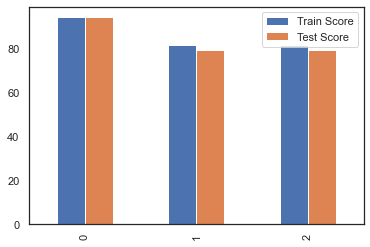

In [36]:
scores.plot.bar()

### - model prediction

In [37]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(grad_Ada.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [38]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': pred_adaboost.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

Observed  Predicted      diff
0      3.85   3.866501 -0.016501
1      3.97   3.959611  0.010389
2      3.92   3.909813  0.010187
3      0.00   0.000000  0.000000
4      4.16   4.171767 -0.011767
5      3.99   4.015813 -0.025813
6      3.68   3.696662 -0.016662
7      4.01   4.014921 -0.004921
8      3.94   3.929361  0.010639
9      4.17   4.171767 -0.001767

<AxesSubplot:>

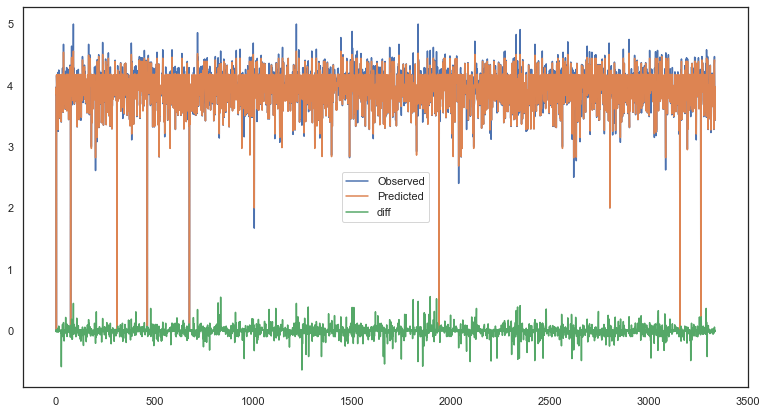

In [40]:
Actual_Predicted.plot(kind='line',figsize=(13,7))

C:\Users\max_c\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

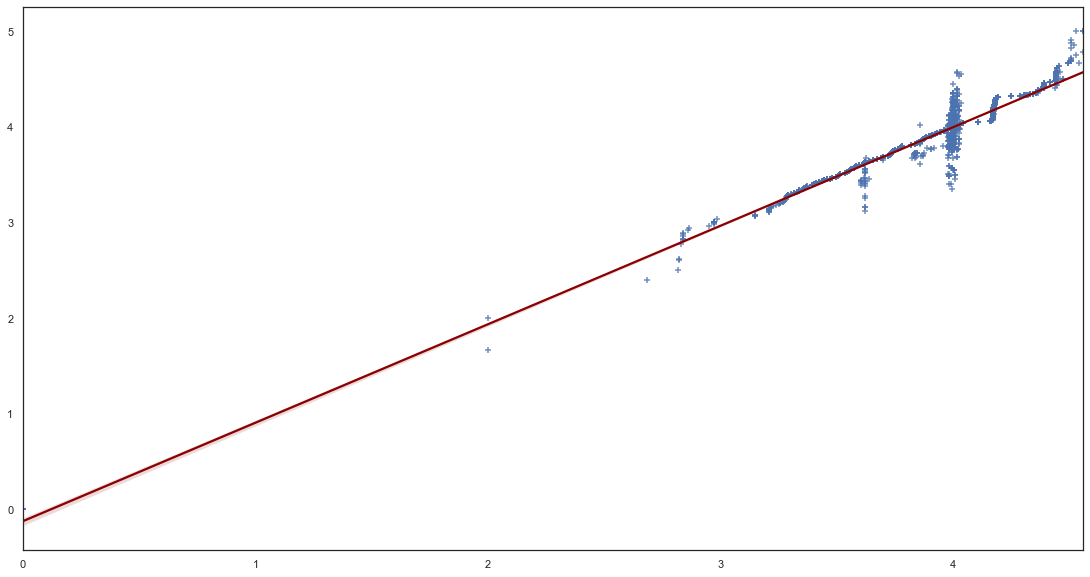

In [39]:
plt.figure(figsize=(19,10))
sns.regplot(pred_adaboost, y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})
